In [1]:
import pandas as pd
import fastai.text as ftxt
import sklearn.model_selection as skms
import numpy as np
import spacy as sp
import pickle
import os

In [3]:
path = os.getcwd()
topic = 'aborto'
os.makedirs(path+'/transfer-model-aborto/'+ topic, exist_ok=True)
path_nn_model= path+'/transfer-model-aborto/'+topic
path_nn_model

'/media/rinnely/Archer/ENES/Stance/Neural-Network-Model/transfer-model-aborto/aborto'

Cargo los datos

In [7]:
# train = pd.read_csv('/home/rinnely/ENES/Stance/abortoautom/clean_aboroatom.csv')
# valid = pd.read_csv('/home/rinnely/ENES/Stance/ManualLabeled/aborto/classified_aborto.csv')

In [8]:
# train.to_csv(path_nn_model+'/train_tweets500.csv', index=False)
# valid.to_csv(path_nn_model+'/valid_tweets500.csv', index=False)

In [4]:
train = pd.read_csv(path_nn_model+'/train.csv')
valid = pd.read_csv(path_nn_model+'/valid.csv')

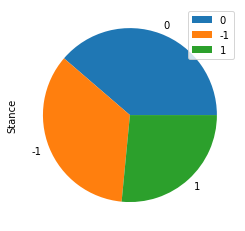

In [5]:
train['Stance'].value_counts().plot.pie(legend=True)

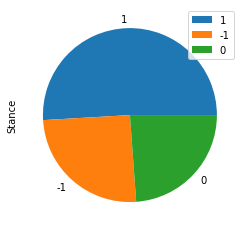

In [6]:
valid['Stance'].value_counts().plot.pie(legend=True)

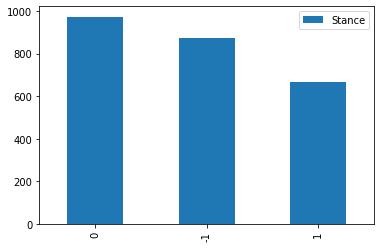

In [7]:
train['Stance'].value_counts().plot.bar(legend=True)

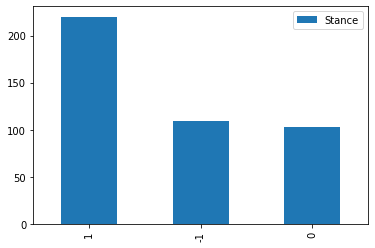

In [8]:
valid['Stance'].value_counts().plot.bar(legend=True)

In [9]:
data_lm = ftxt.TextLMDataBunch.from_df(path_nn_model, train, valid, bs=32)
data_clas = ftxt.TextClasDataBunch.from_df(path_nn_model, train, valid, vocab=data_lm.train_ds.vocab, bs=32)

In [10]:
data_lm.show_batch()

idx,text
0,caen mal . quién se cree usted para decidir que ser humano puede o no vivir ? xxup url xxbos ¡ qué horror ! no dejes que te xxunk con mentiras . así lucha el bebé contra la muerte . no xxunk partidos abortistas . # conabortonotevoto # stopabortion # noalaborto # salvemoslas2vidas xxup url xxbos oremos ! por nuestros hermanos argentinos . xxwrep 6 xxup user # noalaborto #
1,"xxbos cuidado con abrazar posturas feministas que nos xxunk por una ruta distinta a la que el xxunk nos xxunk . # noalaborto es la postura oficial de la iglesia . no xxunk nunca que en cristo hay perdón , esperanza y vida . xxup url xxbos # xxunk "" mi compromiso es defender al xxunk por nacer "" xxunk xxunk . este 26 de enero marca el ☀ xxunk"
2,. es un hitler en xxunk . se cree xxunk de la vida xxunk . no existe derecho a matar # xxunk # noalaborto xxbos xxunk la venta de la xxunk abortiva # misoprostol felicitaciones a la xxunk xxunk xxunk de xxunk que por medio de una xxunk tomó una medida para cuidar en serio a las mujeres y cuidar también a sus hijos # xxunk # noalaborto xxup url
3,la cultura de la muerte . los políticos deberían arbitrar medidas para la defensa de la vida y no favorecer lo contrario . eso sí que sería una sociedad avanzada . # sialavida # noalaborto # noalaeutanasia xxbos exijo como laico católico una firme xxunk de xxup user y de la xxup user ante las declaraciones del presidente electo de argentina acerca de legalizar el xxunk crimen del aborto .
4,"aborto . acabar con la vida humana es un delito ! # noalaborto # méxicoesprovida xxup url xxbos una nación que mata a sus propios hijos , es una nación sin futuro . ' san juan pablo || # sialavida # noalaborto xxup url xxbos esta es la realidad del aborto , no quieren q los niños xxunk , buscan asesinar a mexicanos , por un xxunk económicos . #"


In [11]:
data_clas.show_batch()

text,target
"xxbos xxunk xxup user , 🖕 🏿 🖕 🏿 🖕 🏿 🖕 🏿 🖕 🏿 🖕 🏿 🖕 🏿 🖕 🏿 🖕 🏿 🖕 🏿 🖕 🏾 🖕 🏾 🖕 🏾 🖕 🏾 🖕 🏾 🖕 🏾 🖕 🏾 🖕 🏿 🖕 🏿 🖕 🏾 🖕 🏽 🖕 🏽 🖕 🏽 🖕 🏽 🖕 🏽 🖕 🏾 🖕 🏿 🖕 🏿 🖕 🏾 🖕 🏽 🖕 🏼 🖕 🏼 🖕",1
"xxbos donde está el # psoe ese xxunk del feminismo , ese partido que nos ha xxunk durante años , incluso con mayorías xxunk , que tanto ha hecho por la mujer xxrep 4 . o # xxunk en # madrid siglo xxi xxrep 4 . ahí están los datos # xxunk # feminismo 💜 ✊ 🏼 👇 🏼 👇 🏼 👇 🏼 👇 🏼 👇 🏼 👇 🏼 👇",0
"xxbos # xxunk * que sea ley * : “ la película es un monumento a la nueva era de la política , que es la política de las mujeres . hay que xxunk , ir al cine ; sin falta este xxunk ” rita segato . en el xxunk de alto verde a las xxunk y en el de ruta 20 a las xxunk hs 💚 🎬 🎞 #",1
"xxbos # respete a las # feministas 💪 🏻 recuerde q ellas no xxunk la # navidad , q ni se le ocurra xxunk regalos o xxunk . no xxunk q el 25 de dic , no es xxunk para ellas xq lo q se celebra es un # nacimiento , no es un # aborto y peor si el q nace es el # niño # jesús , no",0
"xxbos "" ¡ xxunk , no son señoras , son niñas y tienen 14 y 12 años . "" "" esas niñas fueron violadas por su padre , por su xxunk , por su xxunk , o por su xxunk , o por su xxunk o por su xxunk . "" ¡ fueron violadas "" debate sobre el # aborto en # ecuador y en el mundo entero # quesealey",1


In [12]:
data_lm.save(path_nn_model+'/data_lm.pkl')
data_clas.save(path_nn_model+'/data_clas.pkl')

In [13]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  '#'],
 4624)

In [14]:
path

'/media/rinnely/Archer/ENES/Stance/Neural-Network-Model'

In [15]:
pretrained_model = (path+'/spanish-model/lm-spanish-weights-2', path+'/spanish-model/spanish-itos-pickle')

In [19]:
learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, pretrained_fnames=pretrained_model, drop_mult=.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 1.58E-01


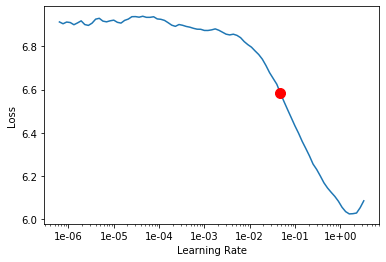

In [20]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [21]:
learn.fit_one_cycle(5,4.8e-02)

epoch,train_loss,valid_loss,accuracy,time
0,5.629758,4.450810,0.201711,00:07
1,4.534699,4.204713,0.229018,00:07
2,3.876721,4.167640,0.227009,00:07
3,3.424026,4.136532,0.229390,00:07
4,3.121504,4.134504,0.231399,00:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.10E-07


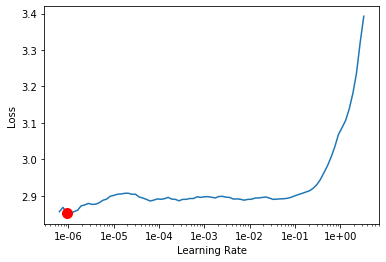

In [24]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [25]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.892187,4.130743,0.233482,00:07
1,2.880377,4.129053,0.232515,00:07
2,2.860179,4.130044,0.232292,00:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.58E-07


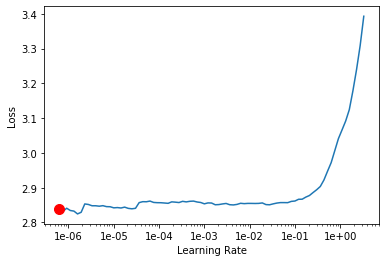

In [28]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [29]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.852268,4.136076,0.230804,00:07
1,2.843093,4.136921,0.232813,00:07
2,2.822305,4.136528,0.232292,00:07


In [26]:
learn.save_encoder(path_nn_model+'/ml_encoder')

In [27]:
learn.save(path_nn_model+'/Neural-Network-Model-aborto')

In [30]:
learn = ftxt.text_classifier_learner(data_clas, ftxt.AWD_LSTM, pretrained=pretrained_model, drop_mult=0.6)

In [31]:
learn.load_encoder(path_nn_model+'/ml_encoder');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.63E-02


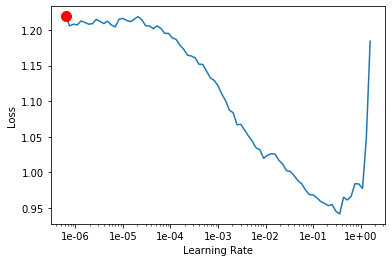

In [32]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [33]:
learn.fit_one_cycle(5,6.3e-07,moms=(0.8, 0.9))

epoch,train_loss,valid_loss,accuracy,time
0,1.222290,1.112613,0.391204,00:04
1,1.209732,1.109385,0.388889,00:04
2,1.204654,1.102276,0.400463,00:04
3,1.200576,1.108419,0.412037,00:05
4,1.188473,1.108821,0.412037,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-03
Min loss divided by 10: 4.79E-03


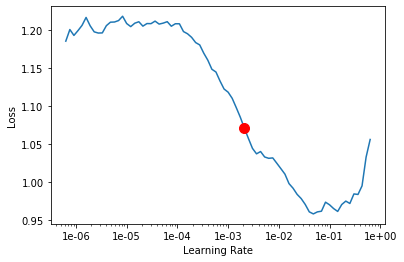

In [34]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [35]:
learn.fit_one_cycle(5,2.1e-03,moms=(0.8, 0.9))

epoch,train_loss,valid_loss,accuracy,time
0,0.835156,1.075911,0.520833,00:05
1,0.687553,1.017033,0.506944,00:05
2,0.630485,1.090417,0.474537,00:04
3,0.577369,1.073735,0.493056,00:05
4,0.558752,1.085027,0.493056,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-05
Min loss divided by 10: 6.31E-08


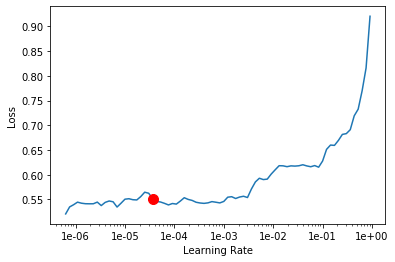

In [36]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [37]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.545177,1.150318,0.483796,00:06
1,0.568731,1.220313,0.446759,00:05
2,0.490202,1.188232,0.483796,00:06
3,0.402944,1.285326,0.509259,00:05
4,0.362547,1.258271,0.509259,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.20E-04


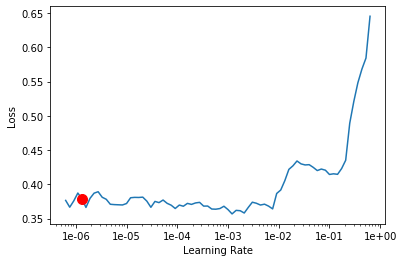

In [38]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [50]:
learn.fit_one_cycle(5,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.468635,1.352616,0.523148,00:09
1,0.287452,2.120368,0.446759,00:10
2,0.136736,2.774296,0.423611,00:09
3,0.057630,3.024052,0.423611,00:10
4,0.034337,2.976459,0.418981,00:09


In [51]:
learn.show_results()

text,target,prediction
"xxbos xxunk xxunk ! han muerto dos xxunk xxunk , dos chicas por un aborto inseguro e xxunk , desde k tu xxunk a tus xxunk votar en contra del # abortolegal legal . espero k no se te haya xxunk xxunk por sus xxunk , xxunk lo k es sus cuerpos están ya bajo tierra , gracias a ti .",1,0
"xxbos q las mujeres aborten o no , no xxunk de tu opinión , ni de tu religión , ni de nada xxunk a vos . las mujeres q quieren abortar , abortan . la pregunta es si estás de acuerdo con q las mujeres pobres mueran y las ricas no , cualquier otra discusión es xxunk . xxup url",1,0
"xxbos que nadie se deje llevar por la cultura de la xxunk . ¡ bravo , chicas ! ¡ ustedes han xxunk alto el honor y la dignidad de las mujeres argentinas ! ¡ nadie podrá parar a la xxunk de la nueva generación ! ¡ # seráley ! ¡ habrá ley contra xxunk y marea ! xxup url",1,0
"xxbos me gustan las xxunk xxunk y xxunk . las que no están xxunk a ningún xxunk xxunk . xxunk , por ejemplo 👉 no a la xxunk de xxunk # xxunk xxunk ️ # síalavida # salamanca # periodismo # publicidad # xxunk xxunk y la xxunk del # pp ! cada vez más xxunk ¡ xxup url",0,0
"xxbos xxunk a casa xxunk y pienso xxunk llegan como yo a sus casas xxunk y todavía tienen trabajo , en casa , xxunk . cada jornada en el congreso por el # abortolegalya me llena de emoción porque nada de lo que pasa xxunk sería posible sin lo qué pasa xxunk . la fuerza es nuestra xxup url",1,1
